<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/%E5%A4%9A%E9%A1%B9%E5%BC%8F%E6%8B%9F%E5%90%88%E5%AE%9E%E9%AA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_train=100
num_test = 100
true_w = [1.2,-3.4,5.6]
true_b = 5
feature = torch.randn((num_train+num_test,1))
ploy_feature = torch.cat((feature,torch.pow(feature,2),torch.pow(feature,3)),1)
labels = true_w[0]*ploy_feature[:,0] + true_w[1]*ploy_feature[:,1] + true_w[2]*ploy_feature[:,2] + true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [3]:
def set_svg_figure():
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  plt.rcParams['figure.figsize']=figsize

In [4]:
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(12,12)):
  set_figsize(figsize)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.semilogy(x_vals,y_vals)
  if x2_vals and y2_vals:
    plt.semilogy(x2_vals,y2_vals,linestyle=':')
    plt.legend(legend)

In [5]:
num_epochs=1000
loss=torch.nn.MSELoss()

In [6]:
def fit_and_plot(train_features,test_features,train_labels,test_labels):
  print('train_feature.shape[-1]:%d'%train_features.shape[-1])
  print('train_feature.shape[0]:%d'%train_features.shape[0])
  print(train_features.shape)
  net=torch.nn.Linear(train_features.shape[-1],1)
  batch_size = min(10,train_labels.shape[0])
  dataset = torch.utils.data.TensorDataset(train_features,train_labels)
  train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
  optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
  train_ls = []
  test_ls = []   
  lp=0
  for i in range(num_epochs):
    for X,y in train_iter:
      y_hat = net(X)
      l = loss(y_hat,y.view(-1,1))
      optimizer.zero_grad()
      l.backward()
      optimizer.step()
    train_labels = train_labels.view(-1,1)
    test_labels = test_labels.view(-1,1)
    train_ls.append(loss(net(train_features),train_labels).item())
    test_ls.append(loss(net(test_features),test_labels).item())
  print('Final epoch:train loss',train_ls[-1],'test loss',test_ls[-1])
  semilogy(range(1,num_epochs+1),train_ls,'epoch','loss',range(1,num_epochs+1),test_ls,['train','test'])
  print('weight',net.weight.data,'\nbias',net.bias.data)

train_feature.shape[-1]:3
train_feature.shape[0]:100
torch.Size([100, 3])
Final epoch:train loss 9.590850822860375e-05 test loss 9.767118172021583e-05
weight tensor([[ 1.1997, -3.4011,  5.6003]]) 
bias tensor([4.9994])


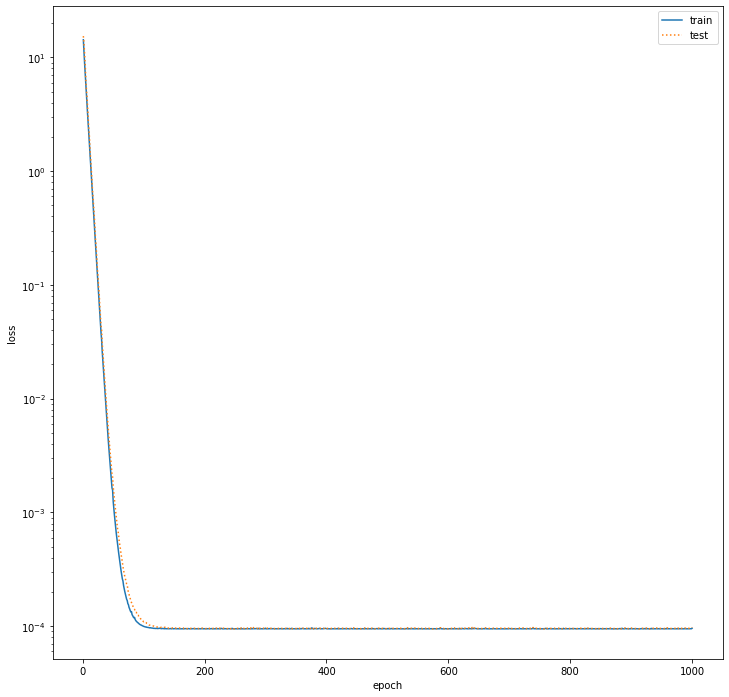

In [7]:
fit_and_plot(ploy_feature[:num_train,:],ploy_feature[num_train:,:],labels[:num_train],labels[num_train:])

train_feature.shape[-1]:1
train_feature.shape[0]:100
torch.Size([100, 1])
Final epoch:train loss 87.93637084960938 test loss 115.52625274658203
weight tensor([[15.4032]]) 
bias tensor([1.0732])


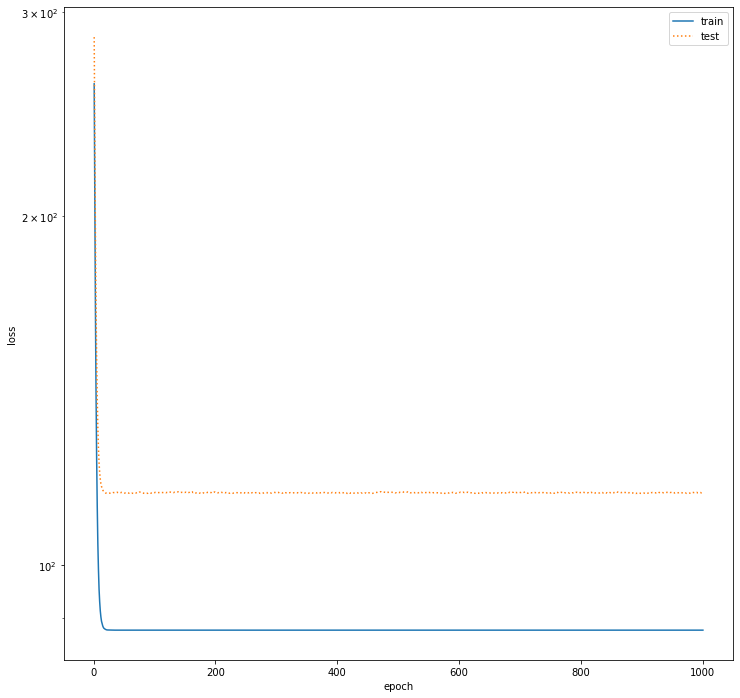

In [8]:
fit_and_plot(feature[:num_train,:],feature[num_train:,:],labels[:num_train],labels[num_train:])

train_feature.shape[-1]:3
train_feature.shape[0]:2
torch.Size([2, 3])
Final epoch:train loss 6.701384336338378e-08 test loss 150.7650909423828
weight tensor([[0.8031, 1.8057, 2.2228]]) 
bias tensor([5.0131])


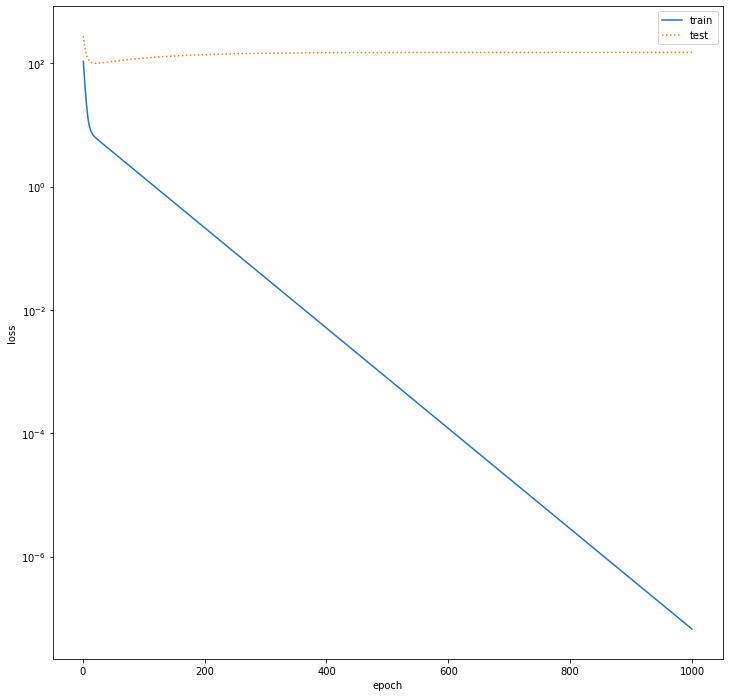

In [9]:
fit_and_plot(ploy_feature[:2,:],ploy_feature[num_train:,:],labels[:2],labels[num_train:])